# Cluster Analysis

In [26]:
import time

import numpy as np
import prince
import pandas as pd
import sklearn.cluster as skcl
import sklearn.metrics as skmet
import sklearn.preprocessing as skpre
import scipy
import matplotlib.pyplot as plt

In [159]:
preproData = pd.read_csv("dataset/preprocessed-shootings.csv")
originalData = pd.read_csv("dataset/shootings.csv")
# Transform fetch original age column which is numeric
d_url = 'dataset/shootings.csv'
shooting_df_age = pd.read_csv(d_url)['age']
scale = skpre.StandardScaler().fit(shooting_df_age.array.reshape(-1, 1))
shooting_df_age = scale.transform(shooting_df_age.array.reshape(-1, 1))
d_url = 'dataset/preprocessed-shootings.csv'
shooting_df_cleaned = pd.read_csv(d_url)
shooting_df_cleaned.age = shooting_df_age

In [51]:
def generateFAMD(data, nbrDim):
    famd = prince.FAMD(
        n_components=nbrDim,
        n_iter=10,
        copy=True,
        check_input=True,
        engine='auto'
    )
    famd = famd.fit(data)
    return famd.row_coordinates(data)
def generateMCA(data, nbrDim):
    mcaData = prince.MCA(n_components=nbrDim, benzecri=False).fit(data)
    return mcaData.row_coordinates(data)
def clusterKmean(data, nbrCluster):
    kmeans = skcl.KMeans(init="random", n_init=10, n_clusters=nbrCluster).fit(data)
    return kmeans.labels_
def clusterHiera(data, nbrCluster):
    Z = scipy.cluster.hierarchy.linkage(data, method="centroid", metric="euclidean")
    nodes = scipy.cluster.hierarchy.fcluster(Z, nbrCluster, criterion="maxclust")
    return nodes

In [52]:
def countClusters(labels):
    cluster = []
    for i in labels:
        if i not in cluster:
            cluster.append(i)
    return len(cluster)

In [53]:
def groupData(data, labels):
   nbrCluster = countClusters(labels)
   clusteredData = data.copy()
   clusteredData["cluster_value"] = labels
   clusteredData["id"] = originalData["id"]
   return clusteredData

In [233]:
output = groupData(preproData, clusterHiera(generateMCA(preproData, 2), 6))

In [234]:
output.groupby("cluster_value")["id"].nunique()

cluster_value
1     144
2       1
3    4120
4     469
5     160
6       1
Name: id, dtype: int64

In [190]:
output

,manner_of_death,age,gender,race,region,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,cluster_value,id
0,shot,51-75,M,Asian,Pacific,Yes,attack,Not fleeing,No,Guns,3,3
1,shot,36-50,M,White,Pacific,No,attack,Not fleeing,No,Guns,3,4
2,shot and Tasered,19-25,M,Hispanic,West North Central,No,other,Not fleeing,No,Unarmed,3,5
3,shot,26-35,M,White,Pacific,Yes,attack,Not fleeing,No,Other unusual objects,3,8
4,shot,36-50,M,Hispanic,Mountain,No,attack,Not fleeing,No,Other weapon objects,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
4890,shot,26-35,M,Black,South Atlantic,No,attack,Foot,Yes,Other weapon objects,3,5916
4891,shot,19-25,M,Black,East North Central,No,attack,Car,No,Guns,3,5925
4892,shot,19-25,F,White,West North Central,No,other,Not fleeing,No,Unarmed,3,5918
4893,shot,19-25,M,White,West North Central,No,other,Other,No,Guns,3,5921


In [151]:
def plotCluster(data, clusterNbr):
    fig, ax = plt.subplots(2,5, figsize=(20, 8))

    columns = data.columns[:10]
    for i in range(len(columns)):
        plottedData = data[data["cluster_value"] == clusterNbr].groupby(columns[i])["id"].nunique()
        x = 0 if i < 5 else 1
        y = i if i < 5 else i-5
        ax[x,y].pie(plottedData.values.tolist(), labels=plottedData.index.tolist())
        ax[x,y].set_title(columns[i])
    fig.suptitle("Repartitions for cluster " + str(clusterNbr) + " with " + str(data[data["cluster_value"] == clusterNbr]["id"].nunique()) + " individuals")

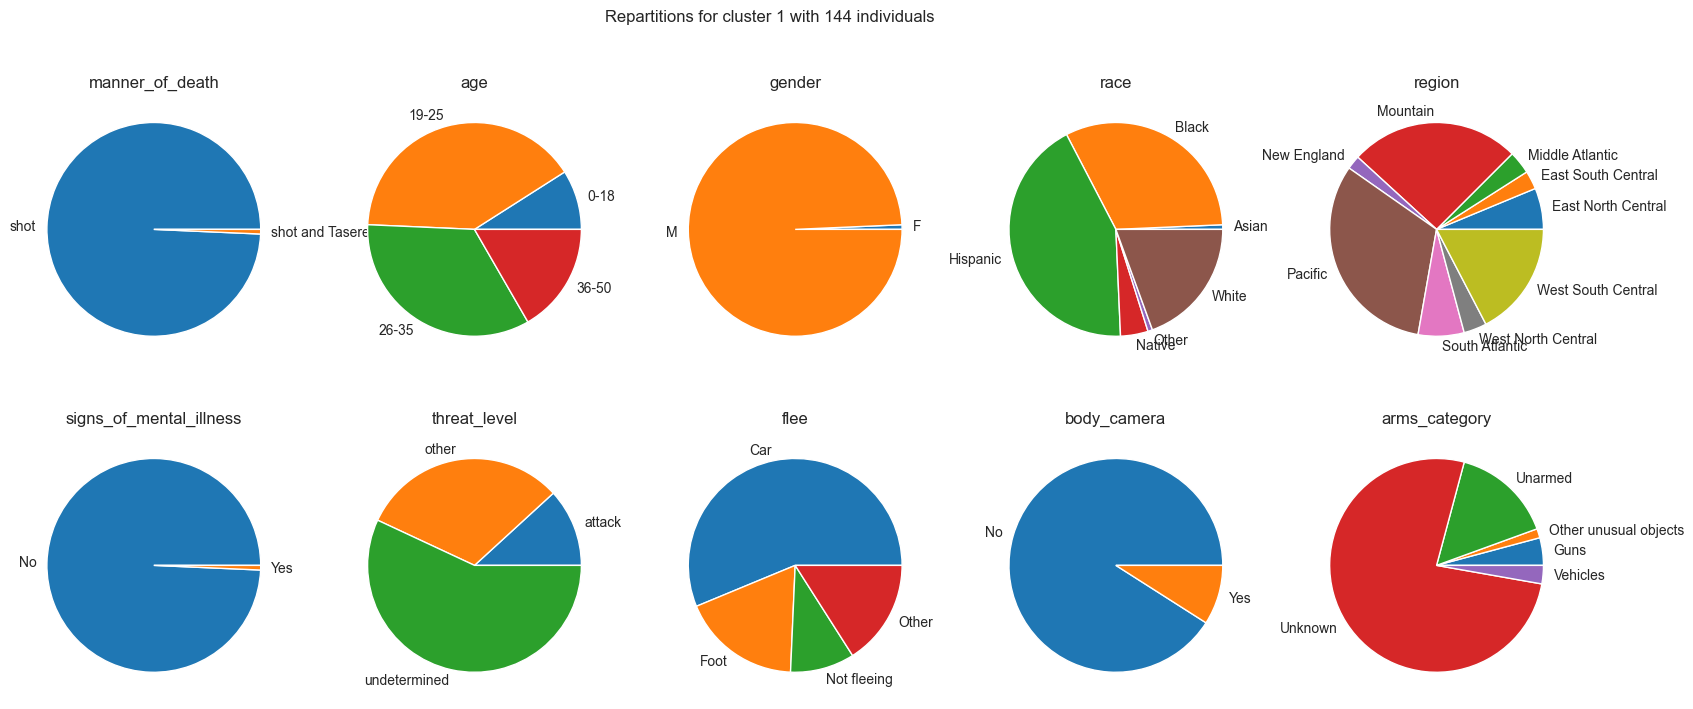

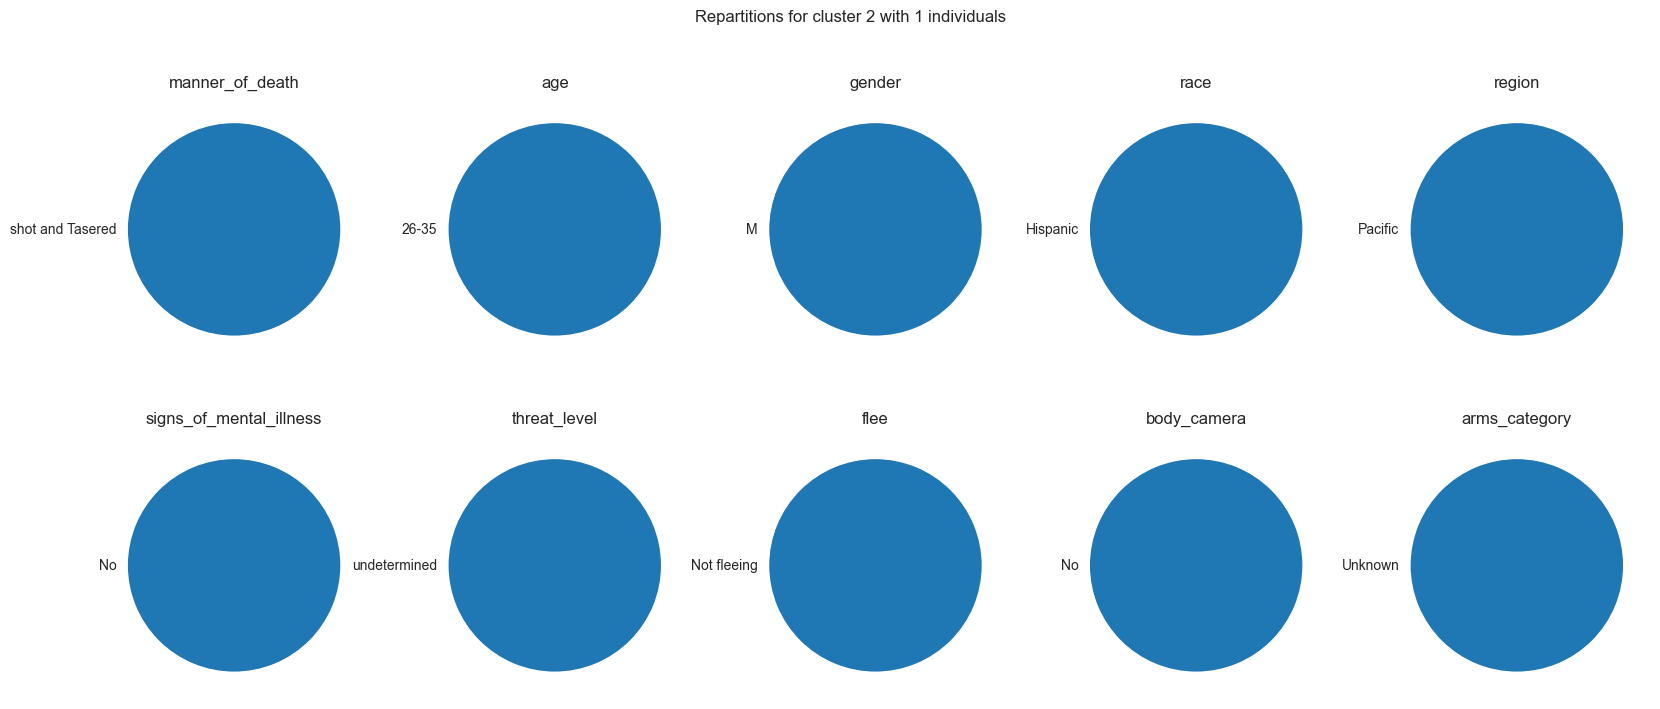

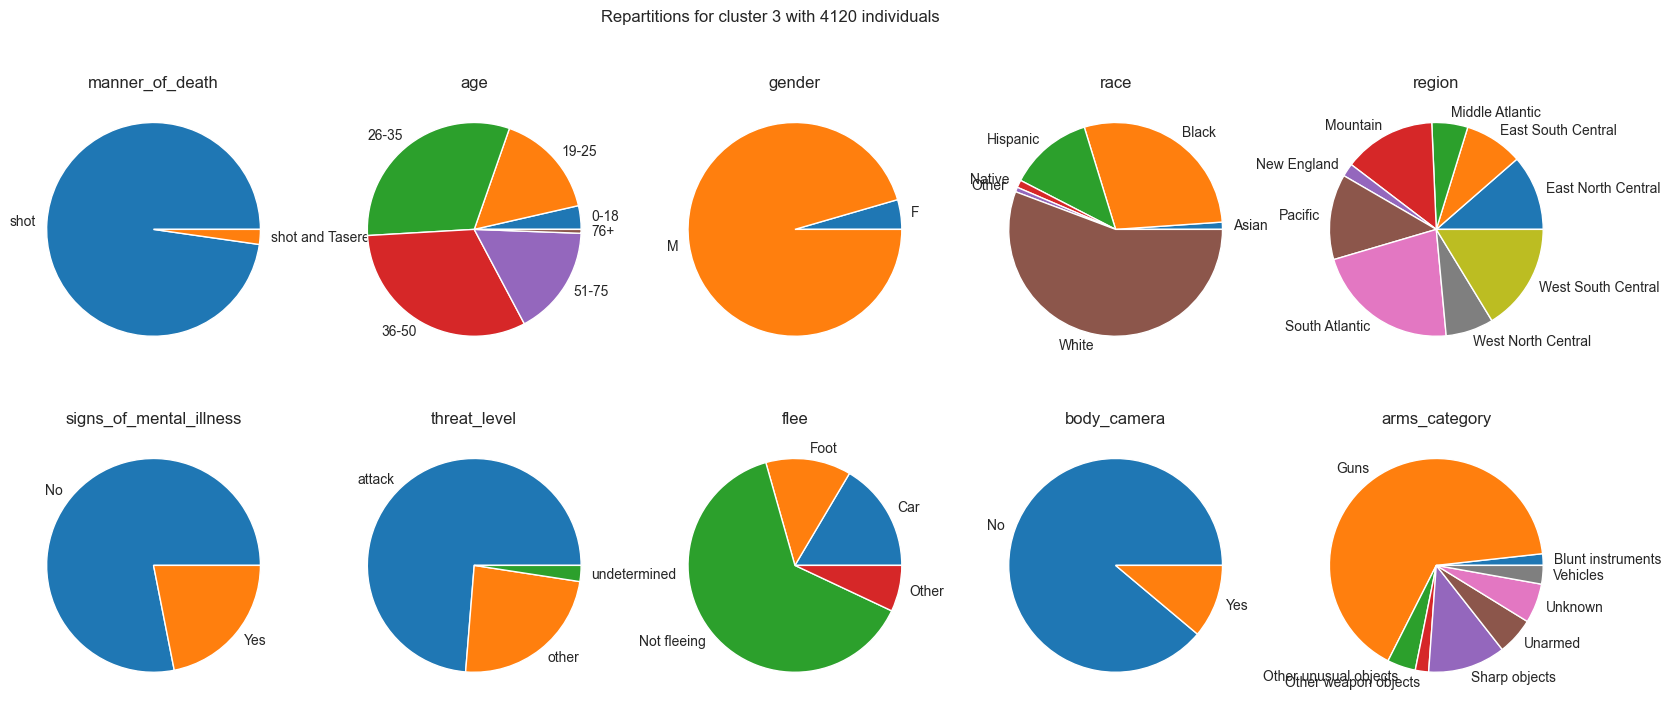

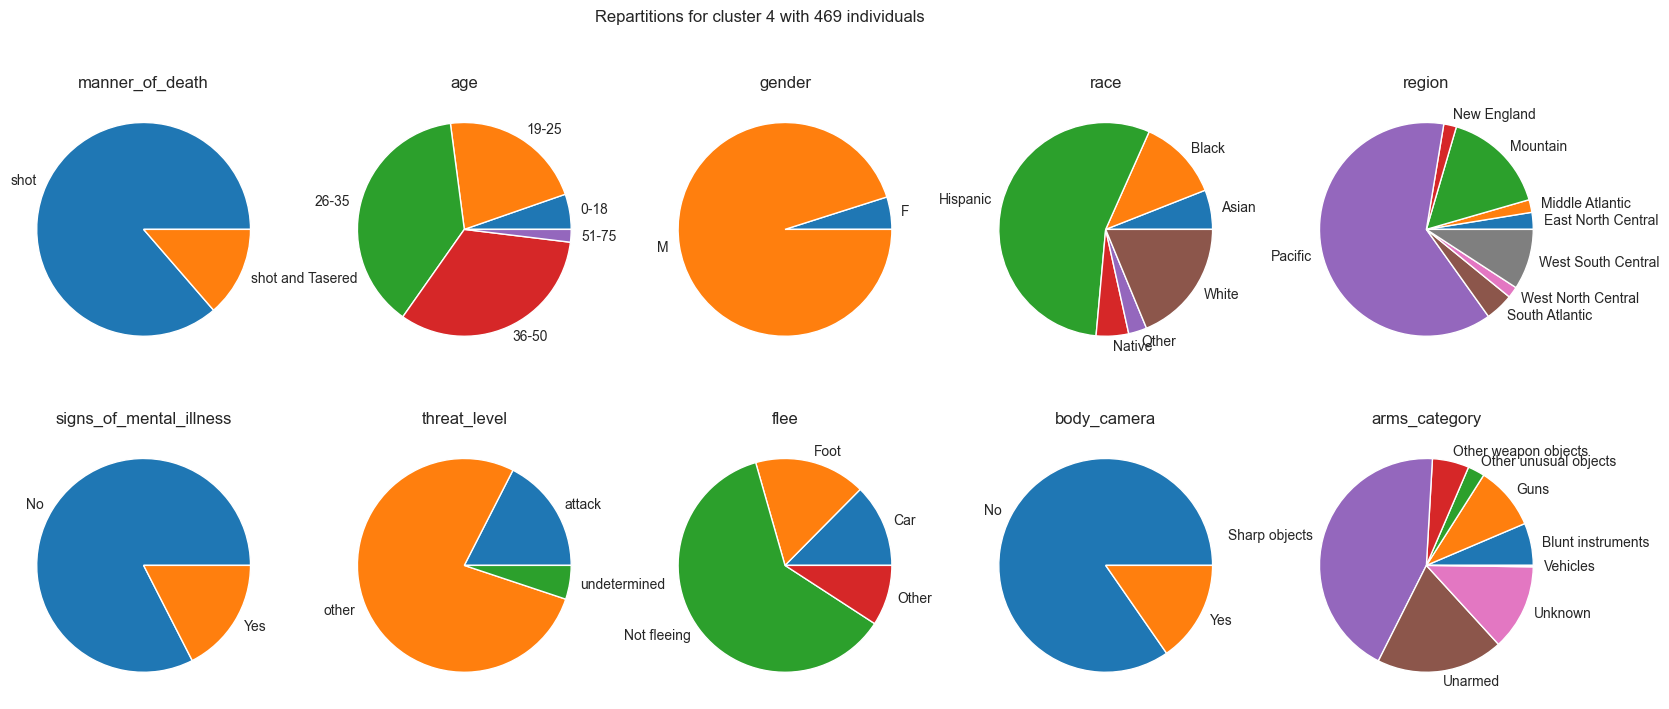

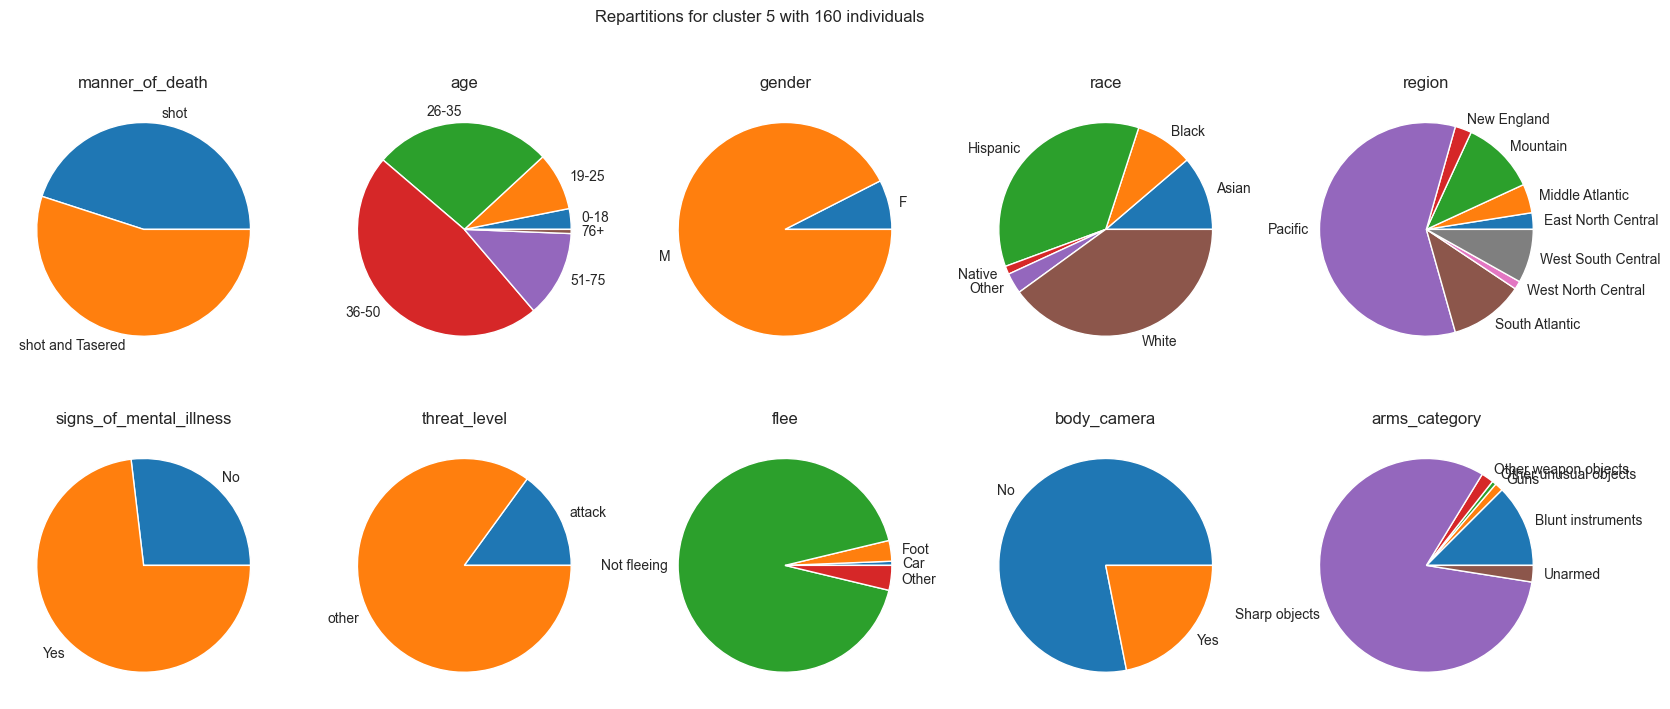

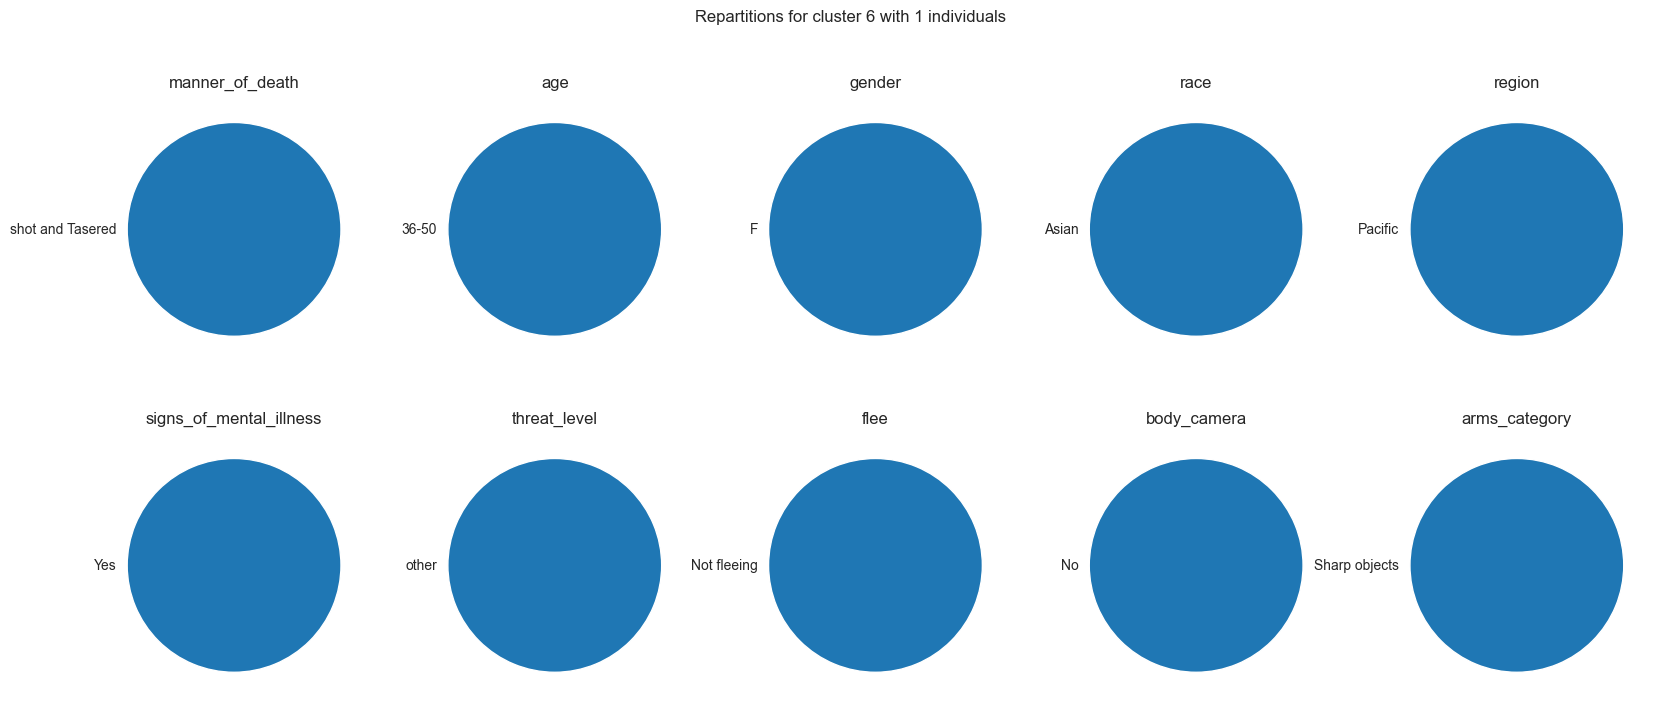

In [236]:
for i in range(1,7):
    plotCluster(output, i)

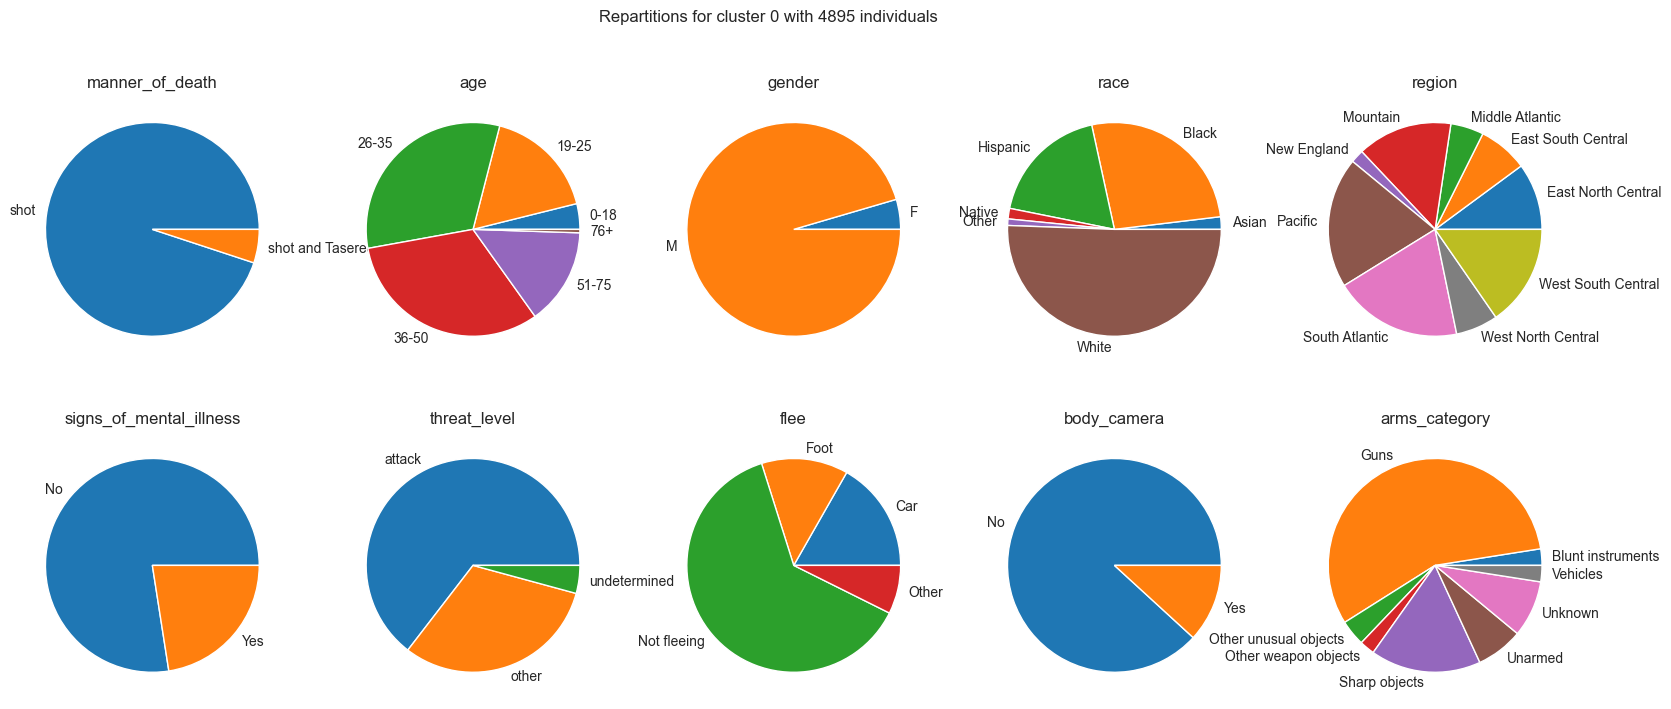

In [164]:
wholeData = groupData(preproData, [0 for i in range(len(preproData))])
plotCluster(wholeData, 0)